In [ ]:
# Breast Cancer Wisconsin (Diagnostic) — Data Exploration & Preprocessing

#Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

# They describe characteristics of the CELL NUCLEI present in the image.

# This notebook follows the workflow:
# 1. Load dataset & Explore  
# 2. Clean  
# 3. Transform  
# 4. Validate  
# 5. Split  
# 6. Apply (Basic Model Preparation)

#Dataset: Built into `sklearn.datasets`



(-0.5, 2399.5, 882.5, -0.5)

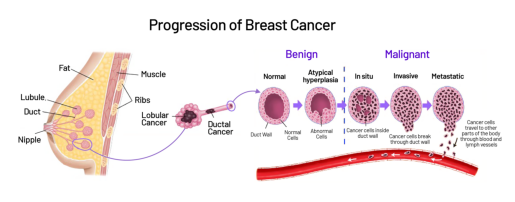

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

img = mpimg.imread("Breast-Cancer-Progression-benign-malignant.png")
plt.imshow(img)

plt.axis("off")


(-0.5, 849.5, 444.5, -0.5)

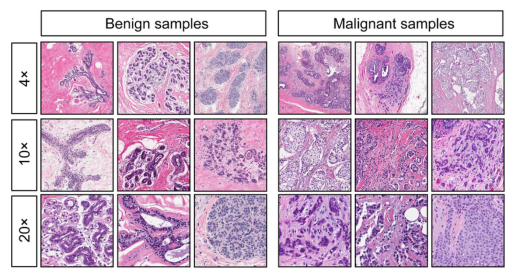

In [45]:
img2= mpimg.imread("maligne_vs_bening.png")
plt.imshow(img2)
plt.axis("off")

In [47]:

from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

# Convert to DataFrame for easier handling
df = pd.DataFrame(bc.data, columns=bc.feature_names)



In [49]:
# Load dataset from sklearn
bc = load_breast_cancer()

# Convert to DataFrame for easier handling
df = pd.DataFrame(bc.data, columns=bc.feature_names)

# Add target variable (0 = malignant, 1 = benign)
df["target"] = bc.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
# General info about features & data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [53]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [55]:
# Check class distribution
df["target"].value_counts()


target
1    357
0    212
Name: count, dtype: int64

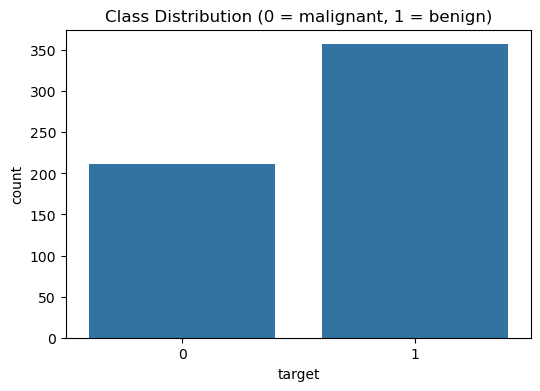

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["target"])
plt.title("Class Distribution (0 = malignant, 1 = benign)")
plt.show()


In [ ]:
# Correlation heatmap (optional but helpful)
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="c

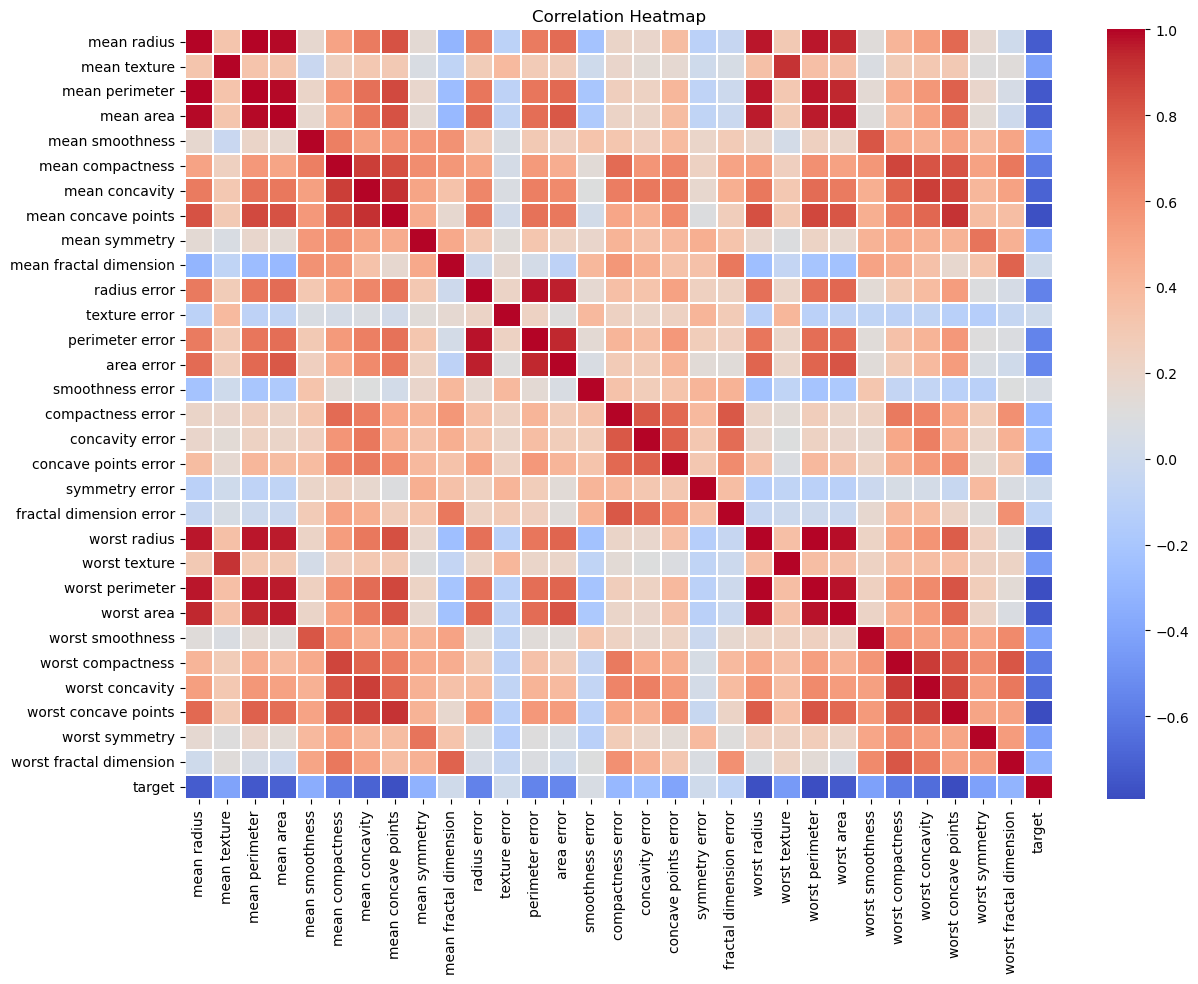

In [ ]:
oolwarm", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Observations from the correlation heatmap

# Strong correlations among size-related features

# Features like radius_mean, perimeter_mean, and area_mean are highly positively correlated (close to +1).

# This confirms that larger tumors tend to have larger perimeter and area, which is biologically expected.

# Shape irregularities correlate with size but less strongly

# Features like concavity_mean and concave points_mean show moderate positive correlation with size features.

# This indicates that more irregular tumors tend to be slightly larger, but not always.


In [67]:
df.isna().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

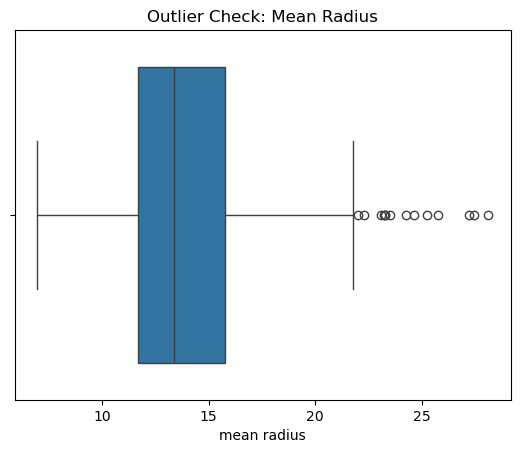

In [65]:
# Example: look at distribution of mean radius
sns.boxplot(x=df["mean radius"])
plt.title("Outlier Check: Mean Radius")
plt.show()


In [ ]:
# Outlier Check: Mean Radius
# --------------------------------
# Boxplots show the distribution of feature values and highlight extreme points (outliers).
# In the Breast Cancer Wisconsin dataset:
# - Each feature (like mean radius, perimeter, area) represents a measurable property of the tumor.
# - Outliers  represent unusually large or small tumors.
# - Outliers are important to note because:
#     • They may indicate rare but real tumor characteristics.

In [83]:
scaler = StandardScaler()

# Select features (drop target)
X = df.drop("target", axis=1)

# Fit-transform
X_scaled = scaler.fit_transform(X)

# Optionally convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [81]:
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((455, 30), (114, 30))

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.989010989010989
Test accuracy: 0.9824561403508771


In [85]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict probabilities (optional, useful for ROC, AUC)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1


In [95]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC (probability-based evaluation)
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


ROC-AUC Score: 0.9953703703703703


mean compactness           0.655016
compactness error          0.627206
fractal dimension error    0.434220
symmetry error             0.356292
texture error              0.239566
mean fractal dimension     0.200007
concavity error            0.171577
worst compactness          0.074017
mean symmetry             -0.158051
smoothness error          -0.168810
worst fractal dimension   -0.194469
mean smoothness           -0.238055
concave points error      -0.450596
mean perimeter            -0.494466
mean radius               -0.531247
mean area                 -0.548629
mean texture              -0.548642
perimeter error           -0.592168
mean concavity            -0.608552
mean concave points       -0.713559
worst smoothness          -0.719987
worst perimeter           -0.767970
worst concavity           -0.823374
area error                -0.899034
worst symmetry            -0.925231
worst area                -0.935964
worst concave points      -0.942609
worst radius              -0

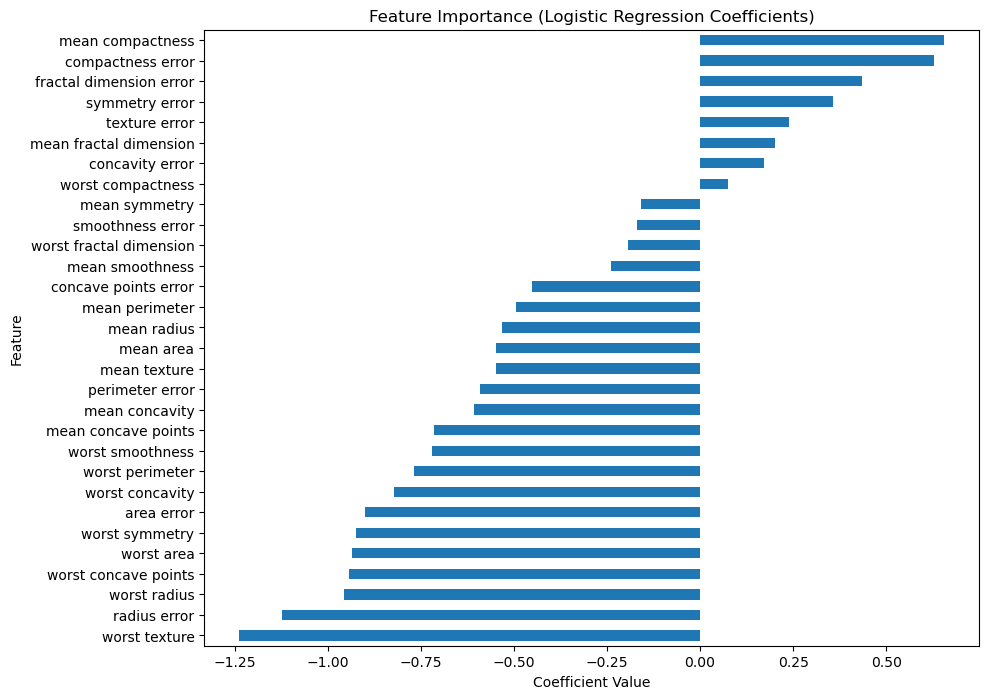

In [33]:
plt.figure(figsize=(10,8))
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [ ]:
 Bars pointing left → negative coefficients → increase malignant probability

Bars pointing right → positive coefficients → increase benign probability

In [ ]:
Radius, area, concave points → most important indicators of malignancy.

Compactness → mildly indicates benign tumors.

Features with small magnitude → less impact, can sometimes be considered less critical.

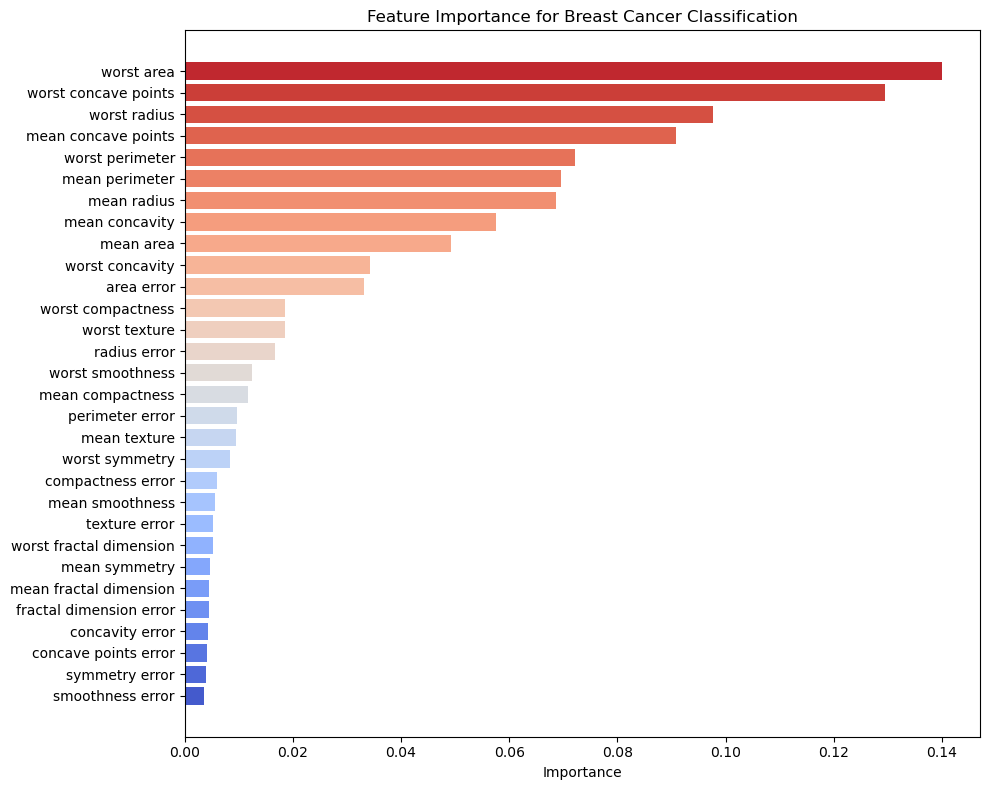

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("coolwarm", len(features))  # color gradient
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance for Breast Cancer Classification')
plt.tight_layout()
plt.show()

In [ ]:
Summary of Feature Importance:
The feature importance chart shows that tumor size features—radius_mean, perimeter_mean, and area_mean—are the most influential in classifying tumors as malignant or benign. 
Shape-related features such as concavity_mean and concave points_mean provide additional predictive power but are less important than size. 
Texture and smoothness features contribute minimally. 
Overall, the model’s focus aligns with biological understanding: malignant tumors tend to be larger and more irregular in shape. 


In [ ]:
Extra conclusions to highlight

Tumor size dominates prediction

radius_mean, perimeter_mean, and area_mean are consistently the top predictors.

This reinforces that larger tumors are much more likely to be malignant, which aligns with medical knowledge.

Shape irregularity is important

concave points_mean and concavity_mean rank in the top 5.

Features describing how irregular or indented the tumor boundary is help distinguish malignant tumors from benign ones.

Redundancy among features

Some top features (like radius_mean and perimeter_mean) are highly correlated.

The model may rely on multiple size measures, but one or two could suffice in simpler models.

Limited role of minor features

Other features outside the top 5 contribute little, so a model using only the top features might perform nearly as well.

This is useful for dimensionality reduction or faster computations.

Biological interpretability

The model’s emphasis matches what doctors look for: size and shape irregularities are the key markers of malignancy.

This adds confidence that the model isn’t just “overfitting” meaningless patterns.